## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.4ms	remaining: 52.4s
1:	learn: 0.9301086	total: 56.3ms	remaining: 28.1s
2:	learn: 0.9005637	total: 61.3ms	remaining: 20.4s
3:	learn: 0.8720983	total: 64.6ms	remaining: 16.1s
4:	learn: 0.8467410	total: 67.7ms	remaining: 13.5s
5:	learn: 0.8226672	total: 70.9ms	remaining: 11.8s
6:	learn: 0.7994702	total: 74.4ms	remaining: 10.6s
7:	learn: 0.7784272	total: 77.4ms	remaining: 9.6s
8:	learn: 0.7602192	total: 80.8ms	remaining: 8.89s
9:	learn: 0.7412421	total: 83.8ms	remaining: 8.3s
10:	learn: 0.7247930	total: 87.2ms	remaining: 7.84s
11:	learn: 0.7089951	total: 90.2ms	remaining: 7.43s
12:	learn: 0.6951345	total: 93.2ms	remaining: 7.08s
13:	learn: 0.6809276	total: 96ms	remaining: 6.76s
14:	learn: 0.6692630	total: 99.2ms	remaining: 6.51s
15:	learn: 0.6588323	total: 102ms	remaining: 6.3s
16:	learn: 0.6472700	total: 106ms	remaining: 6.15s
17:	learn: 0.6379982	total: 109ms	remaining: 5.96s
18:	learn: 0.6294674	total: 112ms	remaining: 5.8s
19

42:	learn: 0.5141148	total: 186ms	remaining: 4.15s
43:	learn: 0.5116444	total: 189ms	remaining: 4.11s
44:	learn: 0.5100547	total: 192ms	remaining: 4.08s
45:	learn: 0.5069096	total: 195ms	remaining: 4.04s
46:	learn: 0.5051685	total: 198ms	remaining: 4.01s
47:	learn: 0.5033968	total: 201ms	remaining: 3.98s
48:	learn: 0.5012433	total: 204ms	remaining: 3.96s
49:	learn: 0.4986132	total: 207ms	remaining: 3.93s
50:	learn: 0.4968022	total: 210ms	remaining: 3.9s
51:	learn: 0.4951632	total: 212ms	remaining: 3.87s
52:	learn: 0.4928924	total: 215ms	remaining: 3.85s
53:	learn: 0.4917272	total: 218ms	remaining: 3.82s
54:	learn: 0.4895079	total: 221ms	remaining: 3.79s
55:	learn: 0.4881884	total: 223ms	remaining: 3.77s
56:	learn: 0.4861566	total: 227ms	remaining: 3.75s
57:	learn: 0.4850201	total: 229ms	remaining: 3.73s
58:	learn: 0.4840055	total: 232ms	remaining: 3.7s
59:	learn: 0.4824455	total: 235ms	remaining: 3.68s
60:	learn: 0.4809744	total: 238ms	remaining: 3.66s
61:	learn: 0.4801376	total: 241ms

107:	learn: 0.4447909	total: 377ms	remaining: 3.11s
108:	learn: 0.4440936	total: 380ms	remaining: 3.11s
109:	learn: 0.4435519	total: 391ms	remaining: 3.16s
110:	learn: 0.4431075	total: 394ms	remaining: 3.15s
111:	learn: 0.4425498	total: 397ms	remaining: 3.15s
112:	learn: 0.4419106	total: 400ms	remaining: 3.14s
113:	learn: 0.4414425	total: 402ms	remaining: 3.13s
114:	learn: 0.4407446	total: 405ms	remaining: 3.12s
115:	learn: 0.4402011	total: 408ms	remaining: 3.11s
116:	learn: 0.4398559	total: 411ms	remaining: 3.1s
117:	learn: 0.4392990	total: 414ms	remaining: 3.09s
118:	learn: 0.4389153	total: 416ms	remaining: 3.08s
119:	learn: 0.4383331	total: 419ms	remaining: 3.07s
120:	learn: 0.4378136	total: 422ms	remaining: 3.06s
121:	learn: 0.4375553	total: 425ms	remaining: 3.06s
122:	learn: 0.4369995	total: 427ms	remaining: 3.05s
123:	learn: 0.4366325	total: 430ms	remaining: 3.04s
124:	learn: 0.4362823	total: 433ms	remaining: 3.03s
125:	learn: 0.4359535	total: 436ms	remaining: 3.02s
126:	learn: 0

169:	learn: 0.4165960	total: 568ms	remaining: 2.77s
170:	learn: 0.4161870	total: 571ms	remaining: 2.77s
171:	learn: 0.4156228	total: 574ms	remaining: 2.76s
172:	learn: 0.4153041	total: 577ms	remaining: 2.76s
173:	learn: 0.4148857	total: 580ms	remaining: 2.75s
174:	learn: 0.4144190	total: 584ms	remaining: 2.75s
175:	learn: 0.4140875	total: 587ms	remaining: 2.75s
176:	learn: 0.4136755	total: 590ms	remaining: 2.74s
177:	learn: 0.4133860	total: 592ms	remaining: 2.73s
178:	learn: 0.4129780	total: 595ms	remaining: 2.73s
179:	learn: 0.4122907	total: 598ms	remaining: 2.72s
180:	learn: 0.4119188	total: 601ms	remaining: 2.72s
181:	learn: 0.4115412	total: 603ms	remaining: 2.71s
182:	learn: 0.4112620	total: 606ms	remaining: 2.71s
183:	learn: 0.4107734	total: 610ms	remaining: 2.7s
184:	learn: 0.4104881	total: 612ms	remaining: 2.7s
185:	learn: 0.4100009	total: 616ms	remaining: 2.69s
186:	learn: 0.4096453	total: 619ms	remaining: 2.69s
187:	learn: 0.4093395	total: 622ms	remaining: 2.69s
188:	learn: 0.

233:	learn: 0.3949269	total: 761ms	remaining: 2.49s
234:	learn: 0.3945894	total: 764ms	remaining: 2.49s
235:	learn: 0.3944181	total: 767ms	remaining: 2.48s
236:	learn: 0.3941497	total: 769ms	remaining: 2.48s
237:	learn: 0.3939819	total: 772ms	remaining: 2.47s
238:	learn: 0.3938322	total: 775ms	remaining: 2.47s
239:	learn: 0.3935463	total: 778ms	remaining: 2.46s
240:	learn: 0.3933166	total: 781ms	remaining: 2.46s
241:	learn: 0.3930992	total: 784ms	remaining: 2.46s
242:	learn: 0.3928898	total: 787ms	remaining: 2.45s
243:	learn: 0.3926199	total: 790ms	remaining: 2.45s
244:	learn: 0.3923955	total: 793ms	remaining: 2.44s
245:	learn: 0.3922312	total: 796ms	remaining: 2.44s
246:	learn: 0.3919499	total: 799ms	remaining: 2.43s
247:	learn: 0.3917420	total: 802ms	remaining: 2.43s
248:	learn: 0.3915186	total: 805ms	remaining: 2.43s
249:	learn: 0.3912759	total: 807ms	remaining: 2.42s
250:	learn: 0.3908375	total: 810ms	remaining: 2.42s
251:	learn: 0.3904815	total: 813ms	remaining: 2.41s
252:	learn: 

298:	learn: 0.3797228	total: 949ms	remaining: 2.23s
299:	learn: 0.3795554	total: 953ms	remaining: 2.22s
300:	learn: 0.3793733	total: 955ms	remaining: 2.22s
301:	learn: 0.3791607	total: 959ms	remaining: 2.21s
302:	learn: 0.3789297	total: 961ms	remaining: 2.21s
303:	learn: 0.3787482	total: 965ms	remaining: 2.21s
304:	learn: 0.3786528	total: 968ms	remaining: 2.21s
305:	learn: 0.3784406	total: 970ms	remaining: 2.2s
306:	learn: 0.3782934	total: 973ms	remaining: 2.2s
307:	learn: 0.3781631	total: 976ms	remaining: 2.19s
308:	learn: 0.3779278	total: 979ms	remaining: 2.19s
309:	learn: 0.3777358	total: 982ms	remaining: 2.18s
310:	learn: 0.3775809	total: 984ms	remaining: 2.18s
311:	learn: 0.3774323	total: 987ms	remaining: 2.18s
312:	learn: 0.3772732	total: 990ms	remaining: 2.17s
313:	learn: 0.3771184	total: 992ms	remaining: 2.17s
314:	learn: 0.3769370	total: 995ms	remaining: 2.16s
315:	learn: 0.3766643	total: 998ms	remaining: 2.16s
316:	learn: 0.3764891	total: 1s	remaining: 2.16s
317:	learn: 0.376

366:	learn: 0.3676022	total: 1.14s	remaining: 1.97s
367:	learn: 0.3674148	total: 1.15s	remaining: 1.97s
368:	learn: 0.3673439	total: 1.15s	remaining: 1.96s
369:	learn: 0.3671985	total: 1.15s	remaining: 1.96s
370:	learn: 0.3670563	total: 1.15s	remaining: 1.96s
371:	learn: 0.3669128	total: 1.16s	remaining: 1.95s
372:	learn: 0.3668381	total: 1.16s	remaining: 1.95s
373:	learn: 0.3666564	total: 1.16s	remaining: 1.95s
374:	learn: 0.3663789	total: 1.17s	remaining: 1.94s
375:	learn: 0.3661576	total: 1.17s	remaining: 1.94s
376:	learn: 0.3659742	total: 1.17s	remaining: 1.94s
377:	learn: 0.3658330	total: 1.18s	remaining: 1.93s
378:	learn: 0.3656680	total: 1.18s	remaining: 1.93s
379:	learn: 0.3654606	total: 1.18s	remaining: 1.93s
380:	learn: 0.3651842	total: 1.18s	remaining: 1.93s
381:	learn: 0.3650538	total: 1.19s	remaining: 1.92s
382:	learn: 0.3649246	total: 1.19s	remaining: 1.92s
383:	learn: 0.3647854	total: 1.19s	remaining: 1.92s
384:	learn: 0.3646814	total: 1.2s	remaining: 1.91s
385:	learn: 0

401:	learn: 0.3620143	total: 1.25s	remaining: 1.86s
402:	learn: 0.3618403	total: 1.26s	remaining: 1.86s
403:	learn: 0.3616747	total: 1.26s	remaining: 1.86s
404:	learn: 0.3614255	total: 1.26s	remaining: 1.85s
405:	learn: 0.3613607	total: 1.26s	remaining: 1.85s
406:	learn: 0.3612875	total: 1.27s	remaining: 1.85s
407:	learn: 0.3611516	total: 1.27s	remaining: 1.84s
408:	learn: 0.3609621	total: 1.27s	remaining: 1.84s
409:	learn: 0.3608193	total: 1.28s	remaining: 1.84s
410:	learn: 0.3604920	total: 1.28s	remaining: 1.83s
411:	learn: 0.3603038	total: 1.28s	remaining: 1.83s
412:	learn: 0.3602055	total: 1.28s	remaining: 1.83s
413:	learn: 0.3599094	total: 1.29s	remaining: 1.82s
414:	learn: 0.3597887	total: 1.29s	remaining: 1.82s
415:	learn: 0.3595791	total: 1.29s	remaining: 1.81s
416:	learn: 0.3594487	total: 1.3s	remaining: 1.81s
417:	learn: 0.3592759	total: 1.3s	remaining: 1.81s
418:	learn: 0.3591088	total: 1.3s	remaining: 1.8s
419:	learn: 0.3589470	total: 1.3s	remaining: 1.8s
420:	learn: 0.3587

464:	learn: 0.3527831	total: 1.45s	remaining: 1.66s
465:	learn: 0.3526445	total: 1.45s	remaining: 1.66s
466:	learn: 0.3525102	total: 1.45s	remaining: 1.66s
467:	learn: 0.3523547	total: 1.46s	remaining: 1.65s
468:	learn: 0.3522115	total: 1.46s	remaining: 1.65s
469:	learn: 0.3521029	total: 1.46s	remaining: 1.65s
470:	learn: 0.3519673	total: 1.46s	remaining: 1.64s
471:	learn: 0.3518082	total: 1.47s	remaining: 1.64s
472:	learn: 0.3516593	total: 1.47s	remaining: 1.64s
473:	learn: 0.3514906	total: 1.47s	remaining: 1.63s
474:	learn: 0.3513843	total: 1.48s	remaining: 1.63s
475:	learn: 0.3512406	total: 1.49s	remaining: 1.64s
476:	learn: 0.3510044	total: 1.49s	remaining: 1.63s
477:	learn: 0.3509121	total: 1.5s	remaining: 1.63s
478:	learn: 0.3507270	total: 1.5s	remaining: 1.63s
479:	learn: 0.3506003	total: 1.5s	remaining: 1.63s
480:	learn: 0.3505111	total: 1.52s	remaining: 1.64s
481:	learn: 0.3503906	total: 1.52s	remaining: 1.64s
482:	learn: 0.3501522	total: 1.52s	remaining: 1.63s
483:	learn: 0.3

514:	learn: 0.3460733	total: 1.64s	remaining: 1.54s
515:	learn: 0.3459427	total: 1.64s	remaining: 1.54s
516:	learn: 0.3458363	total: 1.64s	remaining: 1.53s
517:	learn: 0.3456145	total: 1.64s	remaining: 1.53s
518:	learn: 0.3455174	total: 1.65s	remaining: 1.53s
519:	learn: 0.3453867	total: 1.65s	remaining: 1.52s
520:	learn: 0.3453067	total: 1.65s	remaining: 1.52s
521:	learn: 0.3451017	total: 1.66s	remaining: 1.52s
522:	learn: 0.3449560	total: 1.66s	remaining: 1.51s
523:	learn: 0.3448379	total: 1.66s	remaining: 1.51s
524:	learn: 0.3447174	total: 1.67s	remaining: 1.51s
525:	learn: 0.3446114	total: 1.67s	remaining: 1.5s
526:	learn: 0.3444940	total: 1.67s	remaining: 1.5s
527:	learn: 0.3443508	total: 1.67s	remaining: 1.5s
528:	learn: 0.3442153	total: 1.68s	remaining: 1.49s
529:	learn: 0.3441108	total: 1.68s	remaining: 1.49s
530:	learn: 0.3439546	total: 1.68s	remaining: 1.49s
531:	learn: 0.3438254	total: 1.69s	remaining: 1.48s
532:	learn: 0.3437049	total: 1.69s	remaining: 1.48s
533:	learn: 0.3

575:	learn: 0.3387474	total: 1.83s	remaining: 1.34s
576:	learn: 0.3386361	total: 1.83s	remaining: 1.34s
577:	learn: 0.3385706	total: 1.83s	remaining: 1.34s
578:	learn: 0.3384814	total: 1.84s	remaining: 1.33s
579:	learn: 0.3383559	total: 1.84s	remaining: 1.33s
580:	learn: 0.3382469	total: 1.84s	remaining: 1.33s
581:	learn: 0.3381645	total: 1.85s	remaining: 1.32s
582:	learn: 0.3380538	total: 1.85s	remaining: 1.32s
583:	learn: 0.3379690	total: 1.85s	remaining: 1.32s
584:	learn: 0.3378924	total: 1.86s	remaining: 1.32s
585:	learn: 0.3378307	total: 1.87s	remaining: 1.32s
586:	learn: 0.3377186	total: 1.87s	remaining: 1.31s
587:	learn: 0.3376434	total: 1.87s	remaining: 1.31s
588:	learn: 0.3375696	total: 1.88s	remaining: 1.31s
589:	learn: 0.3374902	total: 1.88s	remaining: 1.3s
590:	learn: 0.3373056	total: 1.88s	remaining: 1.3s
591:	learn: 0.3371913	total: 1.89s	remaining: 1.3s
592:	learn: 0.3371272	total: 1.89s	remaining: 1.29s
593:	learn: 0.3370368	total: 1.89s	remaining: 1.29s
594:	learn: 0.3

637:	learn: 0.3325758	total: 2.02s	remaining: 1.15s
638:	learn: 0.3324324	total: 2.02s	remaining: 1.14s
639:	learn: 0.3323174	total: 2.02s	remaining: 1.14s
640:	learn: 0.3322206	total: 2.03s	remaining: 1.14s
641:	learn: 0.3321031	total: 2.03s	remaining: 1.13s
642:	learn: 0.3319978	total: 2.03s	remaining: 1.13s
643:	learn: 0.3319044	total: 2.04s	remaining: 1.13s
644:	learn: 0.3318169	total: 2.04s	remaining: 1.12s
645:	learn: 0.3316585	total: 2.04s	remaining: 1.12s
646:	learn: 0.3316256	total: 2.05s	remaining: 1.12s
647:	learn: 0.3315220	total: 2.05s	remaining: 1.11s
648:	learn: 0.3313829	total: 2.05s	remaining: 1.11s
649:	learn: 0.3313125	total: 2.06s	remaining: 1.11s
650:	learn: 0.3311735	total: 2.06s	remaining: 1.1s
651:	learn: 0.3310386	total: 2.06s	remaining: 1.1s
652:	learn: 0.3309129	total: 2.06s	remaining: 1.1s
653:	learn: 0.3308321	total: 2.07s	remaining: 1.09s
654:	learn: 0.3307342	total: 2.07s	remaining: 1.09s
655:	learn: 0.3306809	total: 2.07s	remaining: 1.09s
656:	learn: 0.3

695:	learn: 0.3269516	total: 2.21s	remaining: 966ms
696:	learn: 0.3267980	total: 2.21s	remaining: 962ms
697:	learn: 0.3266887	total: 2.22s	remaining: 959ms
698:	learn: 0.3265888	total: 2.22s	remaining: 956ms
699:	learn: 0.3265229	total: 2.22s	remaining: 952ms
700:	learn: 0.3264350	total: 2.22s	remaining: 949ms
701:	learn: 0.3263223	total: 2.23s	remaining: 946ms
702:	learn: 0.3262539	total: 2.23s	remaining: 942ms
703:	learn: 0.3261258	total: 2.23s	remaining: 939ms
704:	learn: 0.3260520	total: 2.24s	remaining: 936ms
705:	learn: 0.3259475	total: 2.24s	remaining: 933ms
706:	learn: 0.3258911	total: 2.24s	remaining: 929ms
707:	learn: 0.3257903	total: 2.24s	remaining: 926ms
708:	learn: 0.3256952	total: 2.25s	remaining: 923ms
709:	learn: 0.3255982	total: 2.25s	remaining: 919ms
710:	learn: 0.3255301	total: 2.25s	remaining: 916ms
711:	learn: 0.3254442	total: 2.26s	remaining: 913ms
712:	learn: 0.3253361	total: 2.26s	remaining: 910ms
713:	learn: 0.3252431	total: 2.26s	remaining: 906ms
714:	learn: 

758:	learn: 0.3214274	total: 2.4s	remaining: 763ms
759:	learn: 0.3212014	total: 2.4s	remaining: 760ms
760:	learn: 0.3211190	total: 2.41s	remaining: 757ms
761:	learn: 0.3210312	total: 2.41s	remaining: 753ms
762:	learn: 0.3209495	total: 2.41s	remaining: 750ms
763:	learn: 0.3208564	total: 2.42s	remaining: 747ms
764:	learn: 0.3207911	total: 2.42s	remaining: 744ms
765:	learn: 0.3206643	total: 2.42s	remaining: 740ms
766:	learn: 0.3205891	total: 2.43s	remaining: 737ms
767:	learn: 0.3204765	total: 2.43s	remaining: 734ms
768:	learn: 0.3203840	total: 2.43s	remaining: 731ms
769:	learn: 0.3203086	total: 2.44s	remaining: 727ms
770:	learn: 0.3202066	total: 2.44s	remaining: 724ms
771:	learn: 0.3200935	total: 2.44s	remaining: 721ms
772:	learn: 0.3200251	total: 2.44s	remaining: 718ms
773:	learn: 0.3199577	total: 2.45s	remaining: 715ms
774:	learn: 0.3198837	total: 2.45s	remaining: 711ms
775:	learn: 0.3198135	total: 2.45s	remaining: 708ms
776:	learn: 0.3197430	total: 2.46s	remaining: 705ms
777:	learn: 0.

827:	learn: 0.3154546	total: 2.59s	remaining: 539ms
828:	learn: 0.3153664	total: 2.6s	remaining: 536ms
829:	learn: 0.3152896	total: 2.6s	remaining: 533ms
830:	learn: 0.3152050	total: 2.61s	remaining: 531ms
831:	learn: 0.3151385	total: 2.63s	remaining: 531ms
832:	learn: 0.3150922	total: 2.63s	remaining: 528ms
833:	learn: 0.3149588	total: 2.64s	remaining: 525ms
834:	learn: 0.3149074	total: 2.64s	remaining: 522ms
835:	learn: 0.3148291	total: 2.64s	remaining: 519ms
836:	learn: 0.3147707	total: 2.65s	remaining: 515ms
837:	learn: 0.3147022	total: 2.65s	remaining: 512ms
838:	learn: 0.3145737	total: 2.65s	remaining: 509ms
839:	learn: 0.3144908	total: 2.65s	remaining: 506ms
840:	learn: 0.3144038	total: 2.66s	remaining: 502ms
841:	learn: 0.3143434	total: 2.66s	remaining: 499ms
842:	learn: 0.3142662	total: 2.66s	remaining: 496ms
843:	learn: 0.3141532	total: 2.67s	remaining: 493ms
844:	learn: 0.3140919	total: 2.67s	remaining: 489ms
845:	learn: 0.3140384	total: 2.67s	remaining: 486ms
846:	learn: 0.

886:	learn: 0.3109334	total: 2.79s	remaining: 355ms
887:	learn: 0.3108347	total: 2.79s	remaining: 352ms
888:	learn: 0.3107647	total: 2.79s	remaining: 349ms
889:	learn: 0.3107302	total: 2.8s	remaining: 346ms
890:	learn: 0.3106509	total: 2.8s	remaining: 342ms
891:	learn: 0.3106139	total: 2.8s	remaining: 339ms
892:	learn: 0.3105421	total: 2.8s	remaining: 336ms
893:	learn: 0.3104659	total: 2.81s	remaining: 333ms
894:	learn: 0.3104028	total: 2.81s	remaining: 330ms
895:	learn: 0.3103186	total: 2.81s	remaining: 327ms
896:	learn: 0.3102488	total: 2.82s	remaining: 323ms
897:	learn: 0.3101565	total: 2.82s	remaining: 320ms
898:	learn: 0.3100955	total: 2.82s	remaining: 317ms
899:	learn: 0.3100512	total: 2.83s	remaining: 314ms
900:	learn: 0.3100138	total: 2.83s	remaining: 311ms
901:	learn: 0.3099635	total: 2.83s	remaining: 308ms
902:	learn: 0.3098989	total: 2.83s	remaining: 304ms
903:	learn: 0.3098084	total: 2.84s	remaining: 301ms
904:	learn: 0.3097402	total: 2.84s	remaining: 298ms
905:	learn: 0.30

948:	learn: 0.3066014	total: 2.98s	remaining: 160ms
949:	learn: 0.3065250	total: 2.98s	remaining: 157ms
950:	learn: 0.3064465	total: 2.98s	remaining: 154ms
951:	learn: 0.3063837	total: 2.98s	remaining: 150ms
952:	learn: 0.3063292	total: 2.99s	remaining: 147ms
953:	learn: 0.3062107	total: 2.99s	remaining: 144ms
954:	learn: 0.3061348	total: 2.99s	remaining: 141ms
955:	learn: 0.3060576	total: 3s	remaining: 138ms
956:	learn: 0.3059772	total: 3s	remaining: 135ms
957:	learn: 0.3058989	total: 3s	remaining: 132ms
958:	learn: 0.3057985	total: 3s	remaining: 128ms
959:	learn: 0.3056692	total: 3.01s	remaining: 125ms
960:	learn: 0.3055777	total: 3.01s	remaining: 122ms
961:	learn: 0.3054462	total: 3.01s	remaining: 119ms
962:	learn: 0.3053516	total: 3.02s	remaining: 116ms
963:	learn: 0.3052664	total: 3.02s	remaining: 113ms
964:	learn: 0.3052264	total: 3.02s	remaining: 110ms
965:	learn: 0.3051873	total: 3.02s	remaining: 106ms
966:	learn: 0.3051018	total: 3.03s	remaining: 103ms
967:	learn: 0.3050172	to

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09854410606501346


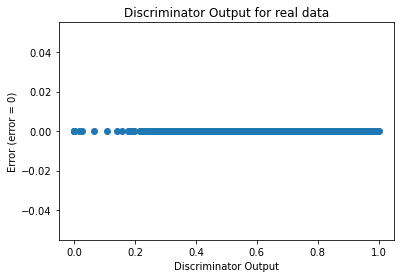

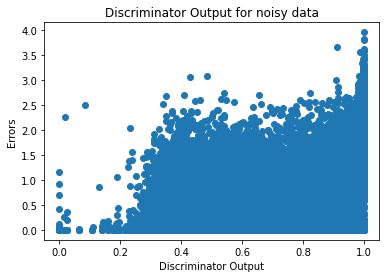

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
